In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('data/events.csv')
shot_attempts = data[data['event_type'] == 1]
print(f"{len(shot_attempts)} shot attempts")



229135 shot attempts


In [30]:
features = ['location', 'bodypart', 'assist_method', 'situation', 'fast_break']
target = 'is_goal'

shot_data = shot_attempts[features + [target]].dropna()  # Drop rows with missing values

X = shot_data[features]
y = shot_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 90.93329260043205%


In [61]:
print(X)

        location  bodypart  assist_method  situation  fast_break
0            9.0       2.0              1        1.0           0
11          15.0       1.0              1        1.0           0
13           9.0       2.0              1        1.0           0
14          15.0       1.0              0        1.0           0
17          15.0       1.0              0        1.0           0
...          ...       ...            ...        ...         ...
940983      15.0       1.0              0        1.0           0
940991      15.0       1.0              1        1.0           0
940992       9.0       1.0              1        1.0           0
940993      15.0       1.0              1        1.0           0
941006       9.0       1.0              1        3.0           0

[229135 rows x 5 columns]


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100}%") 

# Graph the training accuracy per iteration
import matplotlib.pyplot as plt
import numpy as np



Accuracy: 89.38616972527113%


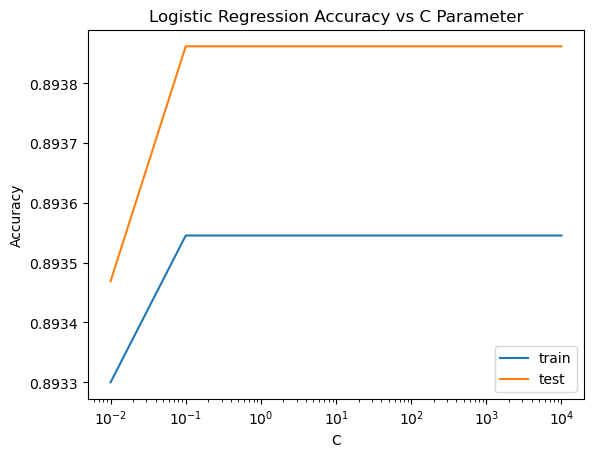

In [65]:
c_vals = np.logspace(-2, 4, 7)
train_accs = []
test_accs = []
for c in c_vals:
    model = LogisticRegression(max_iter=10000, C=c)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.semilogx(c_vals, train_accs, label='train')
plt.semilogx(c_vals, test_accs, label='test')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs C Parameter')
plt.show() 

/Users/andrewma/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrewma/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

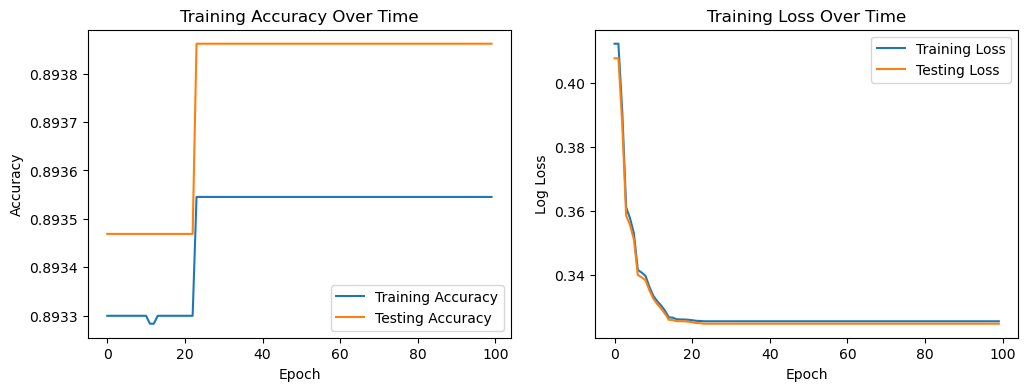

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss



# Lists to store training history
training_accuracy, testing_accuracy = [], []
training_loss, testing_loss = [],[]

# Training loop
for i in range(100):
    # Initialize the Logistic Regression model
    model = LogisticRegression(max_iter=i)
    # Train the model for one epoch
    model.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy and log loss on the training set
    train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
    train_loss, test_loss = log_loss(y_train, model.predict_proba(X_train)), log_loss(y_test, model.predict_proba(X_test))
    
    # Append to the training history lists
    training_accuracy.append(train_accuracy)
    testing_accuracy.append(test_accuracy)
    training_loss.append(train_loss)
    testing_loss.append(test_loss)

# Plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

plt.show()

In [43]:
import sklearn.neural_network


mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(1000), # one hidden layer with 1000 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)  

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions.round())
print(f"Accuracy: {accuracy*100}%")




Accuracy: 89.8924214982434%


(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.3180450663206893
test loss: 0.3180450663206893
(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.3052822448831648
test loss: 0.3052822448831648
(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.29750012137354864
test loss: 0.29750012137354864
(183308,)
[0 0 0 1 0]
(45827,)
[0 0 0 0 0]
train loss: 0.323021567317453
test loss: 0.323021567317453
(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.3440488800243672
test loss: 0.3440488800243672


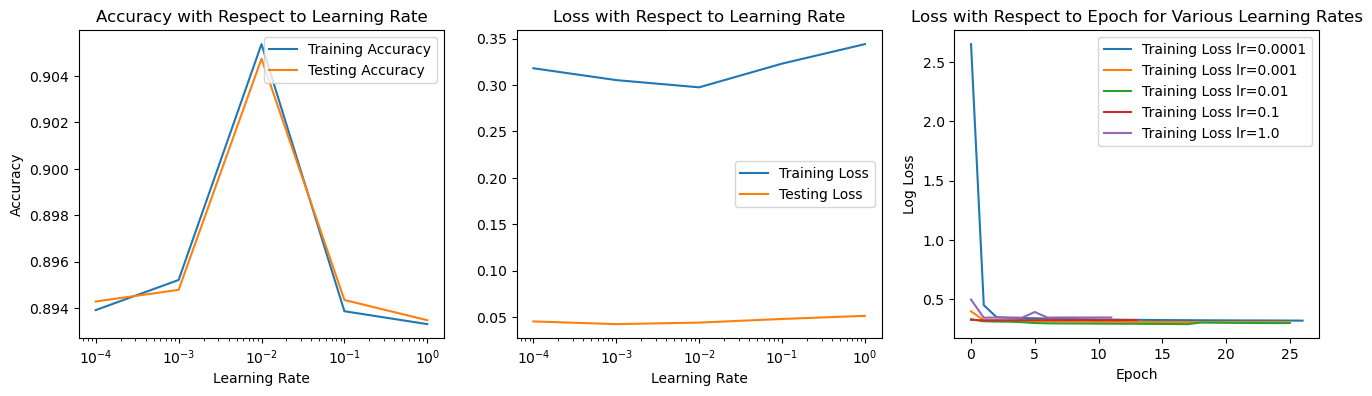

In [56]:
import sklearn.neural_network

def gen_single_hidden_layer_model(lr):
    return sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20), # one hidden layer with 20 features 
                                                activation='relu',        # rectified linear
                                                learning_rate_init=lr,  # learning rate
                                                
                                                max_iter=1000,  
                                                early_stopping=True)  

def graph_lr_accuracies_and_losses(model_gen):
    lrs = np.logspace(-4, 0, 5)

    # Lists to store training history
    training_accuracy, testing_accuracy = [], []
    training_loss, training_loss_curves = [],[]

    for i, lr in enumerate(lrs):
        model = model_gen(lr)
        # Train the model for one epoch
        model.fit(X_train, y_train)
        
        # Make predictions on the training set
        y_train_pred = model.predict(X_train)
        train_loss = model.loss_
        y_test_pred = model.predict(X_test)
        test_loss = model.loss_

        print(y_train_pred.shape)
        print(y_train_pred[:5])
        print(y_test_pred.shape)
        print(y_test_pred[:5])

        print('train loss:', train_loss)
        print('test loss:', test_loss)

        # # Calculate accuracy and log loss on the training set
        train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
        
        # # Append to the training history lists
        training_accuracy.append(train_accuracy)
        testing_accuracy.append(test_accuracy)
        training_loss.append(train_loss)
        training_loss_curves.append(model.loss_curve_)

    # Plot the training history
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.plot(lrs, training_accuracy, label='Training Accuracy')
    plt.plot(lrs, testing_accuracy, label='Testing Accuracy')
    plt.title('Accuracy with Respect to Learning Rate,')
    plt.xlabel('Learning Rate')
    plt.xscale('log')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(lrs, training_loss, label='Training Loss')
    plt.title('Loss with Respect to Learning Rate')
    plt.xlabel('Learning Rate')
    plt.xscale('log')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    for i, lc in enumerate(training_loss_curves):
        plt.plot(range(0, len(lc)), lc, label=f'Training Loss lr={lrs[i]}')
        plt.title('Loss with Respect to Epoch for Various Learning Rates')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.legend()

graph_lr_accuracies_and_losses(gen_single_hidden_layer_model)



(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.2654774003198883
test loss: 0.2654774003198883
(183308,)
[0 0 0 0 0]
(45827,)
[1 0 0 0 0]
train loss: 0.26156343533105997
test loss: 0.26156343533105997
(183308,)
[0 0 0 0 0]
(45827,)
[1 0 0 0 0]
train loss: 0.2710368545551103
test loss: 0.2710368545551103
(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.33999944558018846
test loss: 0.33999944558018846
(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.3495922126222686
test loss: 0.3495922126222686


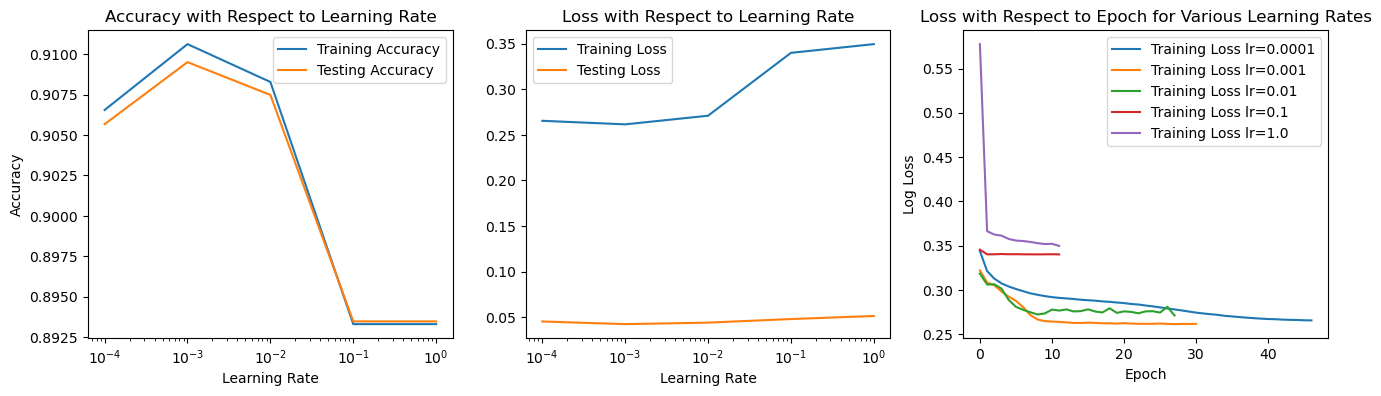

In [58]:
def gen_multi_hidden_layer_model(lr):
    return sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20, 40, 80, 40, 20), # two hidden layers with 20 features each
                                                activation='relu',        # rectified linear
                                                learning_rate_init=lr,  # learning rate
                                                
                                                max_iter=1000,  
                                                early_stopping=True)

graph_lr_accuracies_and_losses(gen_multi_hidden_layer_model)


(183308,)
[0 0 0 1 0]
(45827,)
[1 0 0 0 0]
train loss: 0.26496868456574807
(183308,)
[0 0 0 1 0]
(45827,)
[0 0 0 0 0]
train loss: 0.30321075477103016
(183308,)
[0 0 0 0 0]
(45827,)
[1 0 0 0 0]
train loss: 0.268488396623617
(183308,)
[0 0 0 1 0]
(45827,)
[1 0 0 0 0]
train loss: 0.2696916672891257


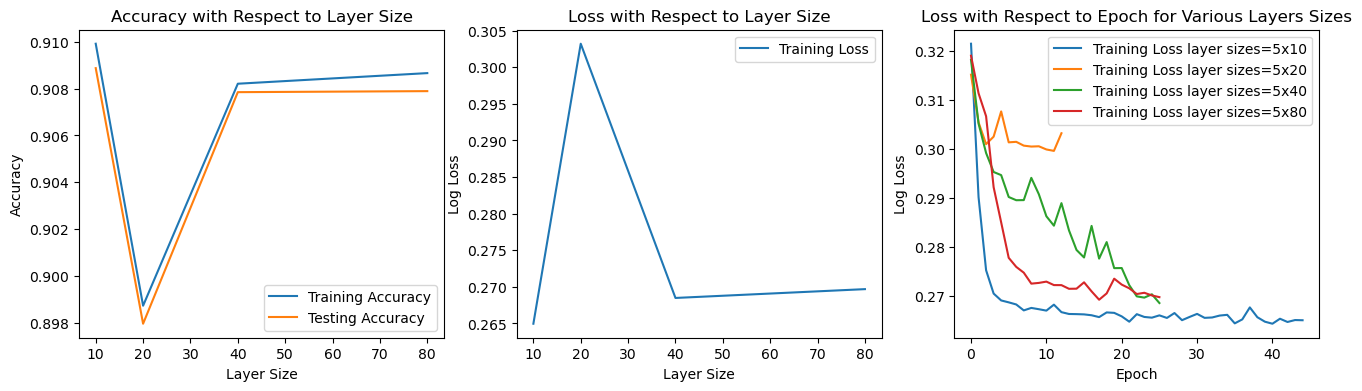

In [63]:

def gen_multi_hidden_layer_model(ls):
    return sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(ls, ls, ls, ls, ls), # two hidden layers with 20 features each
                                                activation='relu',        # rectified linear
                                                learning_rate_init=10e-3,  # learning rate
                                                max_iter=1000,  
                                                early_stopping=True,
                                                learning_rate='adaptive')

def graph_layer_size(model_gen):
    layer_sizes = [10,20,40,80]

    # Lists to store training history
    training_accuracy, testing_accuracy = [], []
    training_loss, training_loss_curves = [],[]

    for i, lr in enumerate(layer_sizes):
        model = model_gen(lr)
        # Train the model for one epoch
        model.fit(X_train, y_train)
        
        # Make predictions on the training set
        y_train_pred = model.predict(X_train)
        train_loss = model.loss_
        y_test_pred = model.predict(X_test)

        print(y_train_pred.shape)
        print(y_train_pred[:5])
        print(y_test_pred.shape)
        print(y_test_pred[:5])

        print('train loss:', train_loss)
        # # Calculate accuracy and log loss on the training set
        train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
        
        # # Append to the training history lists
        training_accuracy.append(train_accuracy)
        testing_accuracy.append(test_accuracy)
        training_loss.append(train_loss)
        training_loss_curves.append(model.loss_curve_)

    # Plot the training history
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.plot(layer_sizes, training_accuracy, label='Training Accuracy')
    plt.plot(layer_sizes, testing_accuracy, label='Testing Accuracy')
    plt.title('Accuracy with Respect to Layer Size')
    plt.xlabel('Layer Size')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(layer_sizes, training_loss, label='Training Loss')
    plt.title('Loss with Respect to Layer Size')
    plt.xlabel('Layer Size')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    for i, lc in enumerate(training_loss_curves):
        plt.plot(range(0, len(lc)), lc, label=f'Training Loss layer sizes=5x{layer_sizes[i]}')
        plt.title('Loss with Respect to Epoch for Various Layers Sizes')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.legend()

graph_layer_size(gen_multi_hidden_layer_model)

(183308,)
[0 0 0 0 0]
(45827,)
[1 0 0 0 0]
train loss: 0.2848064030885745
(183308,)
[0 0 0 1 0]
(45827,)
[0 0 0 0 0]
train loss: 0.2755976037753079
(183308,)
[0 0 0 0 0]
(45827,)
[0 0 0 0 0]
train loss: 0.3068428302781979
(183308,)
[0 0 0 1 0]
(45827,)
[0 0 0 0 0]
train loss: 0.31559927115107334


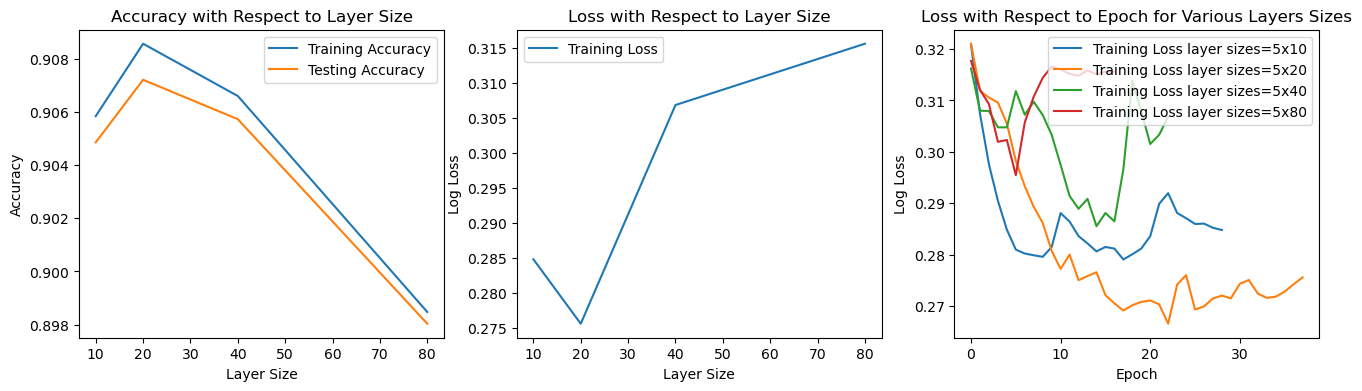

In [64]:
def gen_multi_hidden_layer_mode_non_adaptive(ls):
    return sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(ls, ls, ls, ls, ls), # two hidden layers with 20 features each
                                                activation='relu',        # rectified linear
                                                learning_rate_init=10e-3,  # learning rate
                                                max_iter=1000,  
                                                early_stopping=True)

graph_layer_size(gen_multi_hidden_layer_mode_non_adaptive)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     40945
           1       0.72      0.23      0.34      4882

    accuracy                           0.91     45827
   macro avg       0.82      0.61      0.65     45827
weighted avg       0.89      0.91      0.89     45827



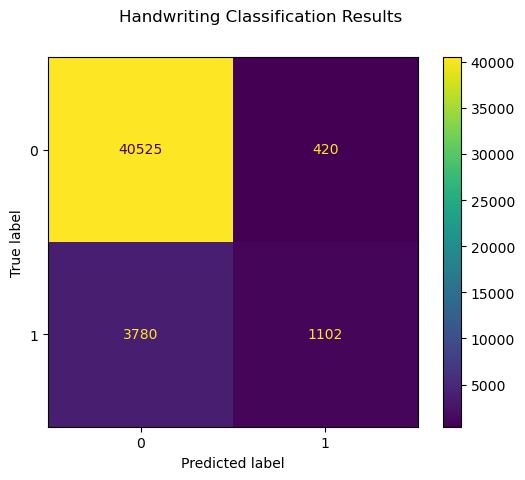

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [74]:
# Make confusion matrix for mlp model
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20), # two hidden layers with 20 features each
                                                activation='relu',        # rectified linear
                                                learning_rate_init=10e-3,  # learning rate
                                                max_iter=1000,  
                                                early_stopping=True,
                                                learning_rate='adaptive')
model.fit(X_train, y_train)
# Replace 0, 1 with 'Miss' and 'Goal' for readability

class_labels = ['Miss', 'Goal']
y_pred = model.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))
mat = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
mat.figure_.suptitle("Handwriting Classification Results")
plt.show()

plt.figure(figsize=(12,6))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     40945
           1       0.70      0.25      0.37      4882

    accuracy                           0.91     45827
   macro avg       0.81      0.62      0.66     45827
weighted avg       0.89      0.91      0.89     45827



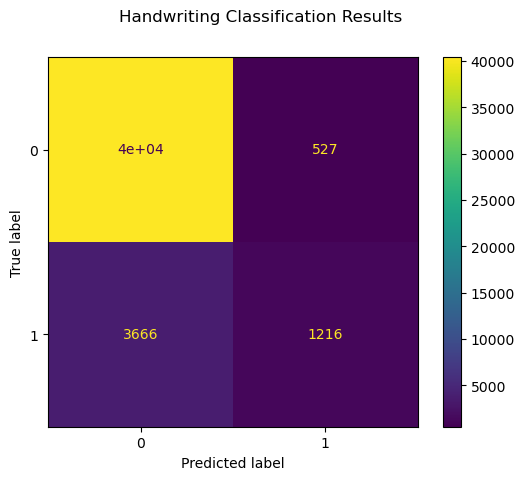

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [75]:
# Make confusion matrix for mlp model
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,40,80,40,20), # two hidden layers with 20 features each
                                                activation='relu',        # rectified linear
                                                learning_rate_init=10e-3,  # learning rate
                                                max_iter=1000,  
                                                early_stopping=True,
                                                learning_rate='adaptive')
model.fit(X_train, y_train)
# Replace 0, 1 with 'Miss' and 'Goal' for readability

class_labels = ['Miss', 'Goal']
y_pred = model.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))
mat = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
mat.figure_.suptitle("Handwriting Classification Results")
plt.show()

plt.figure(figsize=(12,6))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     40945
           1       0.85      0.00      0.01      4882

    accuracy                           0.89     45827
   macro avg       0.87      0.50      0.48     45827
weighted avg       0.89      0.89      0.84     45827



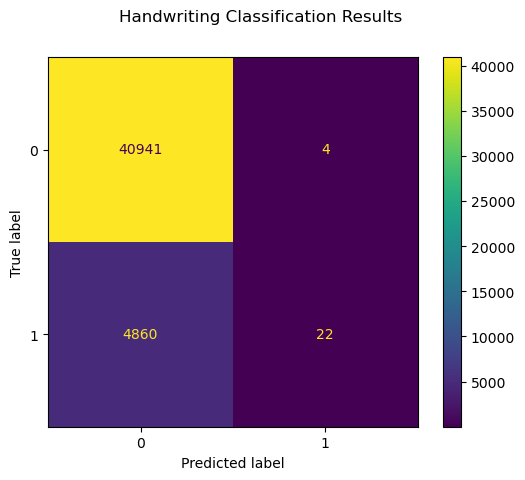

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [73]:
import sklearn.metrics
# Find confusion matrix for logistic regression model
LogisticRegression_model = LogisticRegression(max_iter=10000)
class_labels = ['Miss', 'Goal']
y_pred = model.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))
mat = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
mat.figure_.suptitle("Handwriting Classification Results")
plt.show()

plt.figure(figsize=(12,6))


In [66]:
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=1000, eta0=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions.round())
print(f"Accuracy: {accuracy*100}%")

Accuracy: 10.653108429528443%
